# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 579


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = city_url = f'{url}appid={weather_api_key}&q={city}&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt'] 
    
        # Append the City information into city_data list
        city_data.append({"City": city, 
                        "Lat": city_lat, 
                        "Lng": city_lng, 
                        "Max Temp": city_max_temp,
                        "Humidity": city_humidity,
                        "Cloudiness": city_clouds,
                        "Wind Speed": city_wind,
                        "Country": city_country,
                        "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass  
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | uturoa
Processing Record 4 of Set 1 | bilibino
Processing Record 5 of Set 1 | papatowai
Processing Record 6 of Set 1 | kyaikkami
Processing Record 7 of Set 1 | west island
Processing Record 8 of Set 1 | baruun-urt
Processing Record 9 of Set 1 | cooma
Processing Record 10 of Set 1 | hovd
Processing Record 11 of Set 1 | tolanaro
Processing Record 12 of Set 1 | vorgashor
Processing Record 13 of Set 1 | college
Processing Record 14 of Set 1 | kailua-kona
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | talnakh
Processing Record 17 of Set 1 | blackmans bay
Processing Record 18 of Set 1 | port augusta
Processing Record 19 of Set 1 | udachny
Processing Record 20 of Set 1 | hadibu
Processing Record 21 of Set 1 | i-n-salah
Processing Record 22 of Set 1 | grytviken
Processing Record 23 of Set

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          551
Lat           551
Lng           551
Max Temp      551
Humidity      551
Cloudiness    551
Wind Speed    551
Country       551
Date          551
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,-0.19,55,0,2.57,AR,1690504834
1,port-aux-francais,-49.3500,70.2167,4.84,89,100,9.20,TF,1690504834
2,uturoa,-16.7333,-151.4333,26.70,77,0,3.55,PF,1690504835
3,bilibino,68.0546,166.4372,13.26,59,100,2.83,RU,1690504835
4,papatowai,-46.5619,169.4708,9.09,69,99,2.91,NZ,1690504836


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,-0.19,55,0,2.57,AR,1690504834
1,port-aux-francais,-49.3500,70.2167,4.84,89,100,9.20,TF,1690504834
2,uturoa,-16.7333,-151.4333,26.70,77,0,3.55,PF,1690504835
3,bilibino,68.0546,166.4372,13.26,59,100,2.83,RU,1690504835
4,papatowai,-46.5619,169.4708,9.09,69,99,2.91,NZ,1690504836


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

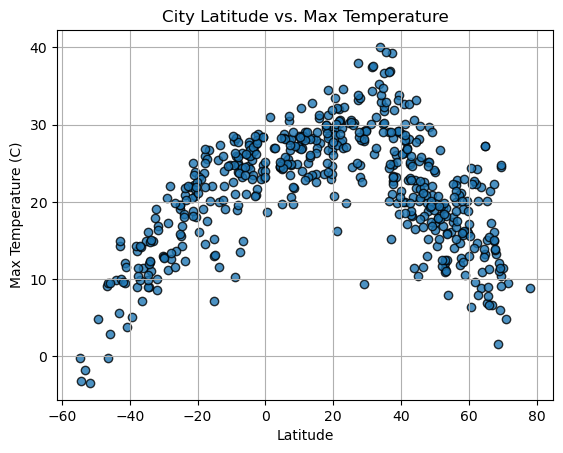

In [9]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values, y_values, edgecolors="black", alpha=0.8)


# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid()
plt.title(f"City Latitude vs. Max Temperature")


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

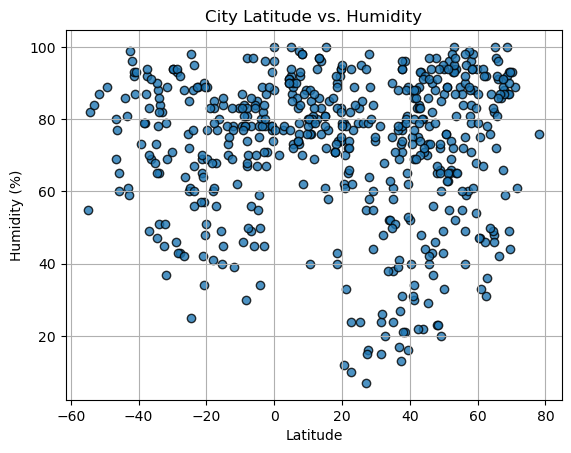

In [11]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values, y_values, edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.title(f"City Latitude vs. Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

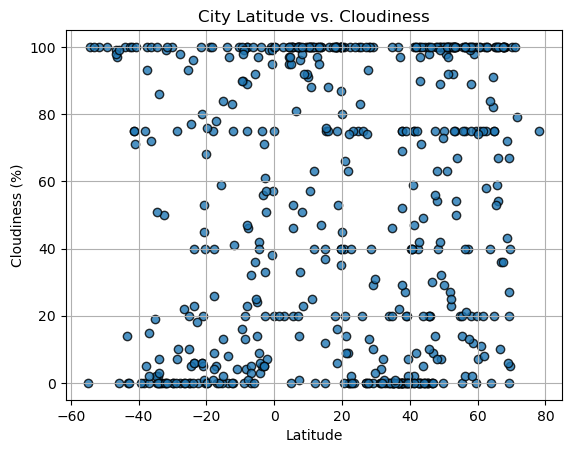

In [12]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values, y_values, edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.title(f"City Latitude vs. Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

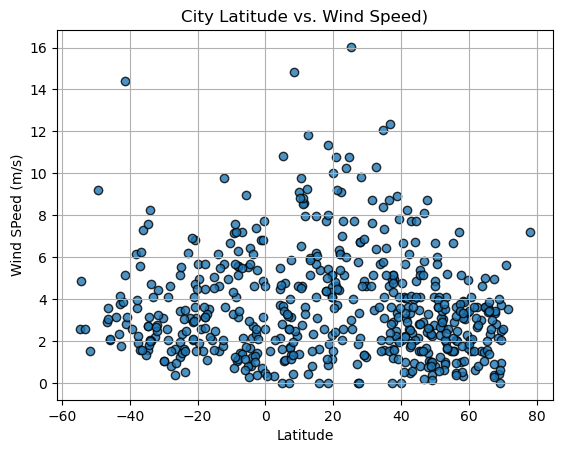

In [13]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values, y_values, edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind SPeed (m/s)')
plt.grid()
plt.title(f"City Latitude vs. Wind Speed)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Define a function to create Linear Regression plots
def regress_plot(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    regress_plot.line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f"The r-value is: {rvalue}")


In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,bilibino,68.0546,166.4372,13.26,59,100,2.83,RU,1690504835
5,kyaikkami,16.0800,97.5675,27.60,85,100,5.38,MM,1690504836
7,baruun-urt,46.6806,113.2792,22.51,43,30,5.81,MN,1690504836
9,hovd,48.0056,91.6419,25.19,23,63,1.42,MN,1690504837
11,vorgashor,67.5833,63.9500,14.97,91,100,0.37,RU,1690504837


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,-0.19,55,0,2.57,AR,1690504834
1,port-aux-francais,-49.3500,70.2167,4.84,89,100,9.20,TF,1690504834
2,uturoa,-16.7333,-151.4333,26.70,77,0,3.55,PF,1690504835
4,papatowai,-46.5619,169.4708,9.09,69,99,2.91,NZ,1690504836
6,west island,-12.1568,96.8225,23.99,78,75,9.77,CC,1690504836


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6315462511704872


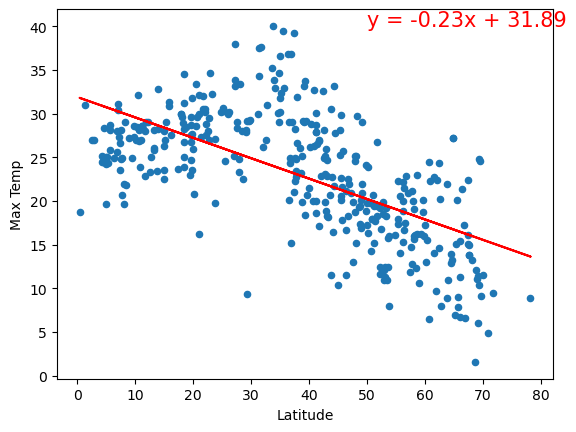

In [30]:
# Linear regression on Northern Hemisphere
from scipy.stats import linregress
regress_plot(northern_hemi_df,'Max Temp',(50,40))

The r-value is: 0.8412695367657457


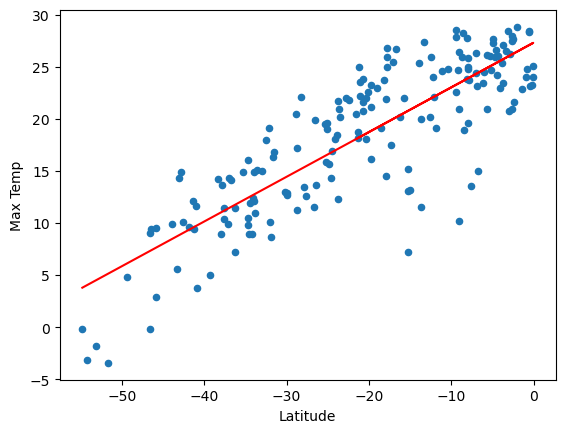

In [41]:
# Linear regression on Southern Hemisphere
regress_plot(southern_hemi_df,'Max Temp',(-50,40))

**Discussion about the linear relationship:** 

These graphs depict a strong correlation between the latitude and temperature on the Souther and Northern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.03657323278460627


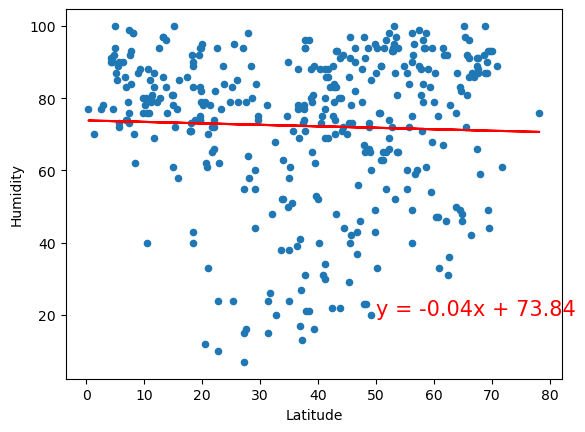

In [35]:
# Northern Hemisphere
regress_plot(northern_hemi_df,'Humidity',(50,20))

The r-value is: -0.04981358425050125


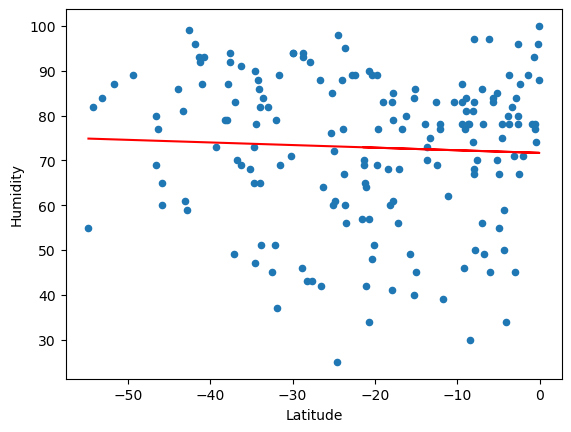

In [36]:
# Southern Hemisphere
regress_plot(southern_hemi_df,'Humidity',(-50,20))

**Discussion about the linear relationship:

There appears to be no clear correlation between the latitude and humidity for the Northern and Southern Hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.03811169668790949


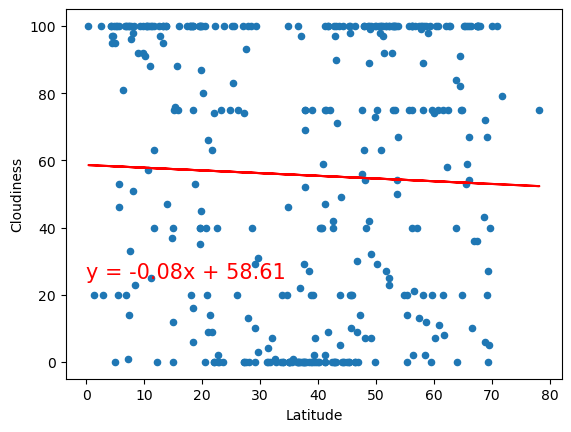

In [37]:
# Northern Hemisphere
regress_plot(northern_hemi_df,'Cloudiness',(0,25))

The r-value is: -0.03207929323173734


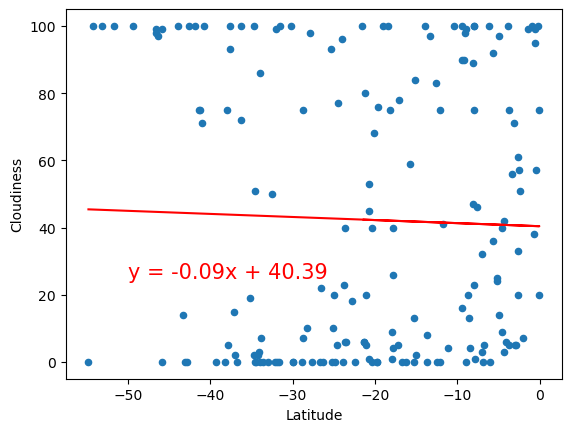

In [38]:
# Southern Hemisphere
regress_plot(southern_hemi_df,'Cloudiness',(-50,25))

**Discussion about the linear relationship:

There appears to be no clear correlation between the latitude and the cloudiness in the Northern and Southern Hemispheres. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.25282428711115557


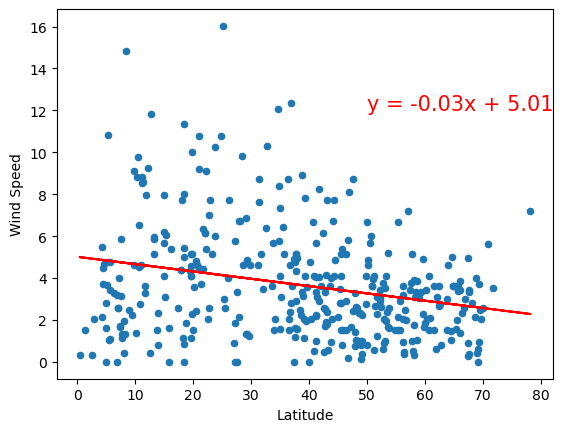

In [39]:
# Northern Hemisphere
regress_plot(northern_hemi_df,'Wind Speed',(50,12))

The r-value is: 0.02419261828096664


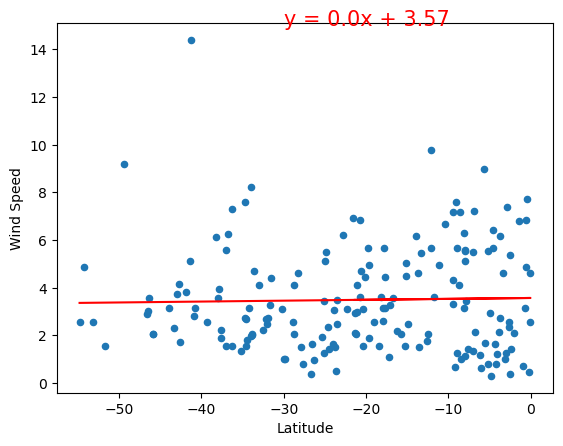

In [40]:
# Southern Hemisphere
regress_plot(southern_hemi_df,'Wind Speed',(-30,15))

**Discussion about the linear relationship:

There appears to be no clear correlation between the latitude and wind speed in the Northern and Souther Hemispheres. 